**Autor:** RAFAEL ARRUDA 

**Profissão:** Data Analyst

**Python:** análise de dados em Python

**Projeto:**  análise de dados utilizando a biblioteca pandas e a geração de visualizações usando a biblioteca matplotlib

**Introdução**

Este projeto tem como foco a análise de dados políticos por meio do uso das linguagens de programação Python e das bibliotecas Pandas e Matplotlib. Utilizando técnicas de Extração, Transformação e Carregamento (ETL), nosso objetivo é processar e visualizar informações políticas direto do site do tse.jus.br/eleicoes/resultados-eleicoes visando a compreensão e interpretação de dados relevantes para a tomada de decisões. Através da manipulação eficaz dos dados e da criação de gráficos informativos, busco identificar tendências, padrões e insights que contribuam para uma análise política mais completa e informada. Neste contexto, Python e suas bibliotecas se mostram ferramentas essenciais para explorar e comunicar dados políticos de forma eficiente, tornando possível tomar decisões embasadas em informações sólidas.

**Metodologia do Projeto**

Neste projeto de análise de dados políticos, seguimos a seguinte metodologia:

Leitura de Dados: Utilizamos a biblioteca Pandas para ler um arquivo CSV contendo informações eleitorais de 2022. Configuramos opções de exibição para facilitar a visualização dos dados.

Seleção de Colunas: Escolhemos as colunas relevantes para a análise, incluindo o número da zona eleitoral, o nome do candidato e a quantidade de votos recebidos.

Filtragem por Zona: Definimos zonas eleitorais específicas que desejávamos analisar e filtramos o DataFrame original para incluir apenas os dados dessas zonas.

Agrupamento de Dados: Agrupamos os dados por zona eleitoral e candidato, calculando a soma dos votos recebidos por cada candidato em cada zona.

Visualização de Dados: Criamos gráficos  para representar a quantidade de votos por candidato em cada zona eleitoral. Além disso, geramos gráficos de pizza para destacar a distribuição percentual de votos entre os candidatos em cada zona.

Personalização de Gráficos: Ajustamos o tamanho das figuras para garantir a clareza e a legibilidade dos gráficos de barras e pizza. Também adicionamos espaço entre os gráficos de pizza e de barras para melhorar a apresentação visual.

Exibição de Resultados: Exibimos os gráficos gerados para visualização e análise.

Essa metodologia nos permitiu realizar uma análise eficaz dos resultados eleitorais em zonas eleitorais específicas, identificando a quantidade de votos recebidos por candidatos e sua distribuição percentual em cada zona.

A partir deste ponto, começa o processo de ETL propriamente dito.

- **Extração:** Base coletada a partir do site URL: https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_RJ.zip
- **Transformação:**  Tratamento foram executadas. Para a geração de um .CSV com somente os dados que iremos utilizar.
- **Carregamento:** Transformação das alterações em .csv.

# Extração dos dados

Criação de Tabelas .CSV

Foram extraido os dados da tabelas original através de consulta SQL.

Da seguinte forma :

1. Criei uma nova tabela com os seguintes atributos:
   - NM_MUNICIPIO
   - NR_ZONA
   - NR_SECAO
   - DS_CARGO
   - NM_VOTAVEL
   - QT_VOTOS
   


2. Após foram feitas as alterações:
   - Substituição dos NM_VOTAVEL pelos nomes dos candidatos como se encontrava nas urnas(Referente ao usuário)
   - Substituição dos NM_MUNICIPIO pelos nomes corretos. (Referente ao local que analisei)
   - Salvei copia com os dados atualizados.



In [1]:

# Repositório da analise conta com vinte milhões, oitenta e oito mil, seiscentos e trinta e sete dados disponíveis.
Dados_eleitoral = 'https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_RJ.zip'

# Extract Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [1]:

import pandas as pd

# Define opções de exibição para exibir todas as colunas lado a lado
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Lê o arquivo CSV
df = pd.read_csv("dados_2022.csv", sep=',', encoding='latin1')

# Seleciona as colunas desejadas
colunas = ['NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO', 'NM_VOTAVEL', 'QT_VOTOS']
df_filter = df[colunas]

# Exibe o DataFrame
print(df_filter)

df_filter.to_csv("dados_2022.csv", index=False)

                NM_MUNICIPIO  NR_ZONA  NR_SECAO           DS_CARGO                    NM_VOTAVEL  QT_VOTOS
0                      CARMO      102         9   DEPUTADO FEDERAL  MARCOS PAULO BARBOSA TAVARES         1
1                NOVA IGUA?U      156       309   DEPUTADO FEDERAL  MARCOS PAULO BARBOSA TAVARES         3
2                   ITABORA?      104        34   DEPUTADO FEDERAL  MARCOS PAULO BARBOSA TAVARES         4
3                NOVA IGUA?U      158       230   DEPUTADO FEDERAL  MARCOS PAULO BARBOSA TAVARES         1
4            DUQUE DE CAXIAS      127        30   DEPUTADO FEDERAL  MARCOS PAULO BARBOSA TAVARES         2
...                      ...      ...       ...                ...                           ...       ...
48115           BELFORD ROXO      153       148  DEPUTADO ESTADUAL     RICARDO CORRÃA DE BARROS         2
48116  ARMAÃÃO DOS BÃZIOS      172       102  DEPUTADO ESTADUAL     RICARDO CORRÃA DE BARROS         6
48117          SÃO GONÃALO       68

Transform
- Utilizando PANDAS para ler no Dado_2022.CSV e salvando novamente com as alterações.

In [3]:
import pandas as pd

# Lê o arquivo CSV original
df = pd.read_csv("dados_2022.csv", sep=',', encoding='latin1')

# Limpa os nomes dos municípios para remover caracteres especiais
df['NM_MUNICIPIO'] = df['NM_MUNICIPIO'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

# Substitui "MAGÃ" e "MAGE?" por "MAGE" na coluna "NM_MUNICIPIO"
df['NM_MUNICIPIO'] = df['NM_MUNICIPIO'].str.replace(r'MAG|MAG\?', 'MAGE', regex=True)

# Substitui as ocorrências desejadas na coluna "NM_VOTAVEL"
df['NM_VOTAVEL'] = df['NM_VOTAVEL'].str.replace('MARCOS PAULO BARBOSA TAVARES', 'MARCOS TAVARES')
df['NM_VOTAVEL'] = df['NM_VOTAVEL'].str.replace('ROGÃ\x83Â\x89RIO TEIXEIRA JUNIOR', 'JUNINHO DO PNEU')
df['NM_VOTAVEL'] = df['NM_VOTAVEL'].str.replace('RICARDO CORRÃ\x83Â\x8aA DE BARROS', 'RICARDO DA KAROL')

# Salva o DataFrame atualizado em um novo arquivo CSV
df.to_csv("dados_2022_atualizado_final.csv", index=False, sep=',', encoding='latin1')

# Imprime o DataFrame resultante
print(df)

          NM_MUNICIPIO  NR_ZONA  NR_SECAO           DS_CARGO        NM_VOTAVEL  QT_VOTOS
0                CARMO      102         9   DEPUTADO FEDERAL    MARCOS TAVARES         1
1          NOVA IGUA?U      156       309   DEPUTADO FEDERAL    MARCOS TAVARES         3
2             ITABORA?      104        34   DEPUTADO FEDERAL    MARCOS TAVARES         4
3          NOVA IGUA?U      158       230   DEPUTADO FEDERAL    MARCOS TAVARES         1
4      DUQUE DE CAXIAS      127        30   DEPUTADO FEDERAL    MARCOS TAVARES         2
...                ...      ...       ...                ...               ...       ...
48115     BELFORD ROXO      153       148  DEPUTADO ESTADUAL  RICARDO DA KAROL         2
48116  ARMAO DOS BZIOS      172       102  DEPUTADO ESTADUAL  RICARDO DA KAROL         6
48117        SO GONALO       68       321  DEPUTADO ESTADUAL  RICARDO DA KAROL         1
48118  DUQUE DE CAXIAS      200         1  DEPUTADO ESTADUAL  RICARDO DA KAROL         1
48119  DUQUE DE CAXIA

#Filtrando os dados por municipio

In [5]:
import pandas as pd

# Define opções de exibição para exibir todas as colunas lado a lado
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Lê o arquivo CSV
df = pd.read_csv("dados_2022_atualizado_final.csv", sep=',', encoding='latin1')

# Seleciona as colunas desejadas
colunas = ['NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'DS_CARGO', 'NM_VOTAVEL', 'QT_VOTOS']
df_filter = df[colunas]

# Filtra o DataFrame pelo valor da coluna NM_MUNICIPIO desejado (por exemplo, "MAGE")
municipio= "MAGE"
df_filtrado = df_filter[df_filter['NM_MUNICIPIO'] == municipio]

# Exibe o DataFrame filtrado
print(df_filtrado)

# Salva o DataFrame filtrado em um novo arquivo CSV (opcional)
df_filtrado.to_csv("dados_2022_filtrados.csv", index=False)

      NM_MUNICIPIO  NR_ZONA  NR_SECAO           DS_CARGO        NM_VOTAVEL  QT_VOTOS
18954         MAGE      110       553   DEPUTADO FEDERAL    MARCOS TAVARES        18
18955         MAGE      148        77   DEPUTADO FEDERAL    MARCOS TAVARES         1
18965         MAGE      110        15   DEPUTADO FEDERAL    MARCOS TAVARES         4
18981         MAGE      148        43   DEPUTADO FEDERAL    MARCOS TAVARES         3
18998         MAGE      110       523   DEPUTADO FEDERAL    MARCOS TAVARES         1
...            ...      ...       ...                ...               ...       ...
48066         MAGE      110        32  DEPUTADO ESTADUAL  RICARDO DA KAROL         9
48077         MAGE      110       126  DEPUTADO ESTADUAL  RICARDO DA KAROL        12
48083         MAGE      148       124  DEPUTADO ESTADUAL  RICARDO DA KAROL        29
48110         MAGE      148       180  DEPUTADO ESTADUAL  RICARDO DA KAROL        19
48114         MAGE      148       126  DEPUTADO ESTADUAL  RICARDO

# Carregando os GRAFICOS
-Plotando graficos em barra e pizza com dados.

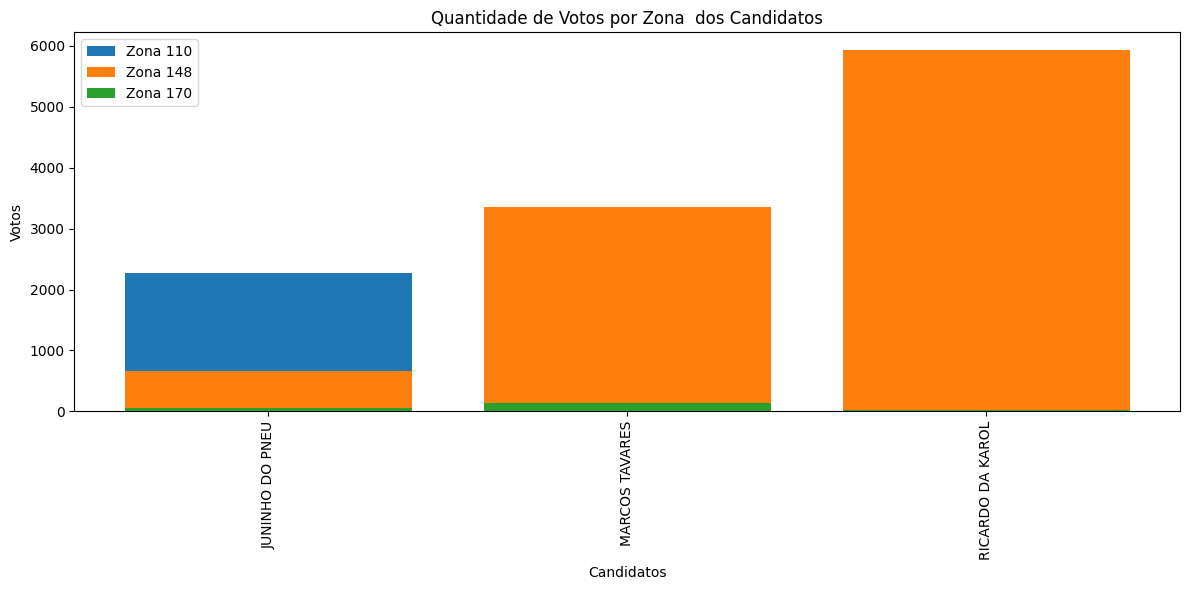

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define opções de exibição para exibir todas as colunas lado a lado
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Lê o arquivo CSV
df = pd.read_csv("dados_2022_atualizado_final.csv", sep=',', encoding='latin1')

# Seleciona as colunas desejadas
colunas = ['NR_ZONA', 'NM_VOTAVEL', 'QT_VOTOS']
df_filter = df[colunas]

# Especifique as zonas que deseja incluir no gráfico
zonas_selecionadas = [110, 148, 170]

# Filtra o DataFrame para incluir apenas as zonas selecionadas
df_filtrado = df_filter[df_filter['NR_ZONA'].isin(zonas_selecionadas)]

# Agrupa os dados por NR_ZONA e NM_VOTAVEL e calcula a soma dos votos
df_agrupado = df_filtrado.groupby(['NR_ZONA', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

# Cria um gráfico de barras
plt.figure(figsize=(12, 6))
for zona in df_agrupado['NR_ZONA'].unique():
    df_zona = df_agrupado[df_agrupado['NR_ZONA'] == zona]
    plt.bar(df_zona['NM_VOTAVEL'], df_zona['QT_VOTOS'], label=f'Zona {zona}')


plt.title("Quantidade de Votos por Zona  dos Candidatos")
plt.xlabel("Candidatos")
plt.ylabel("Votos")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


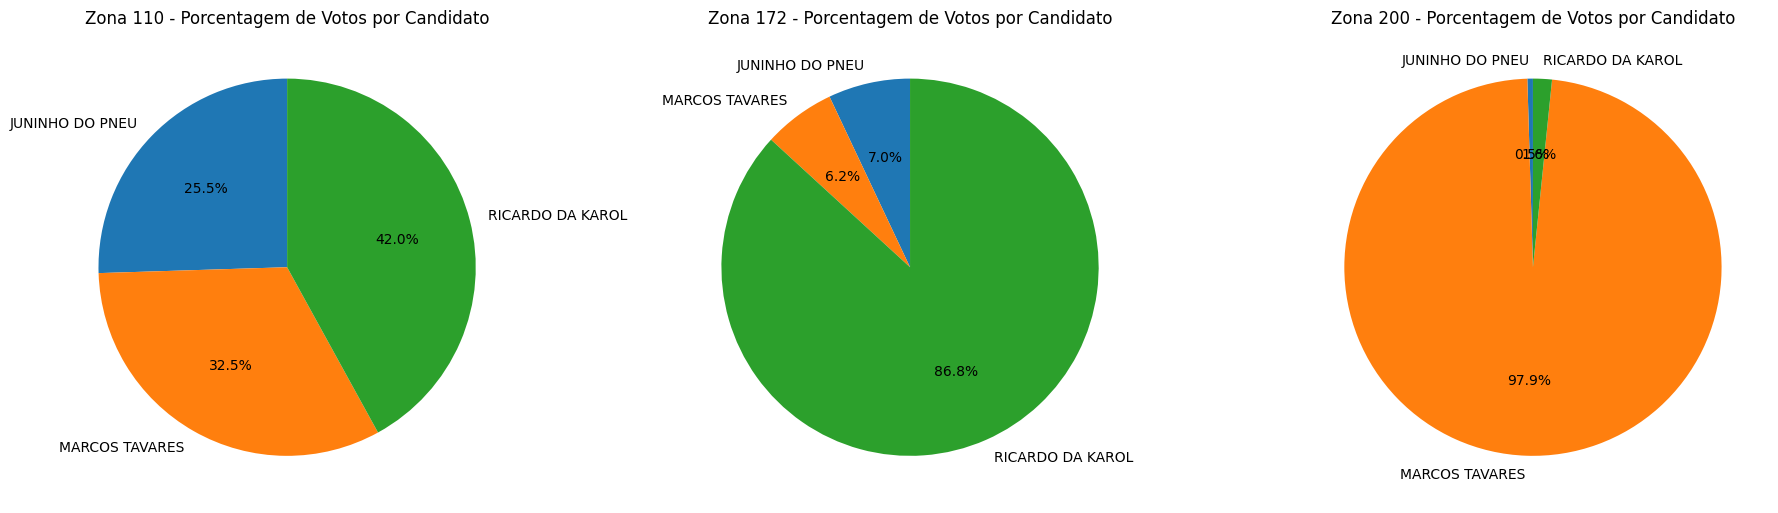

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a exibição para que todas as colunas fiquem lado a lado.
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Lendo o CSV
df = pd.read_csv("dados_2022_atualizado_final.csv", sep=',', encoding='latin1')

# Seleciona colunas 
colunas = ['NR_ZONA', 'NM_VOTAVEL', 'QT_VOTOS']
df_filter = df[colunas]

# Agrupa os dados por NR_ZONA e NM_VOTAVEL e calcula a soma dos votos
df_agrupado = df_filter.groupby(['NR_ZONA', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

# Obtém a lista de zonas
zonas = df_agrupado['NR_ZONA'].unique()

# Define as zonas selecionadas
zonas_selecionadas = [110, 172, 200]

# Calcula o número de colunas necessário com base no número de zonas selecionadas
num_colunas = len(zonas_selecionadas)

# Cria subplots para os gráficos de pizza
fig, axs = plt.subplots(1, num_colunas, figsize=(6 * num_colunas, 6))

# Itera sobre as zonas selecionadas e cria um gráfico de pizza para cada zona
for i, zona in enumerate(zonas_selecionadas):
    df_zona = df_agrupado[df_agrupado['NR_ZONA'] == zona]
    total_votos = df_zona['QT_VOTOS'].sum()
    porcentagens = df_zona['QT_VOTOS'] / total_votos * 100

    axs[i].pie(porcentagens, labels=df_zona['NM_VOTAVEL'], autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f"Zona {zona} - Porcentagem de Votos por Candidato")

plt.tight_layout()
plt.show()


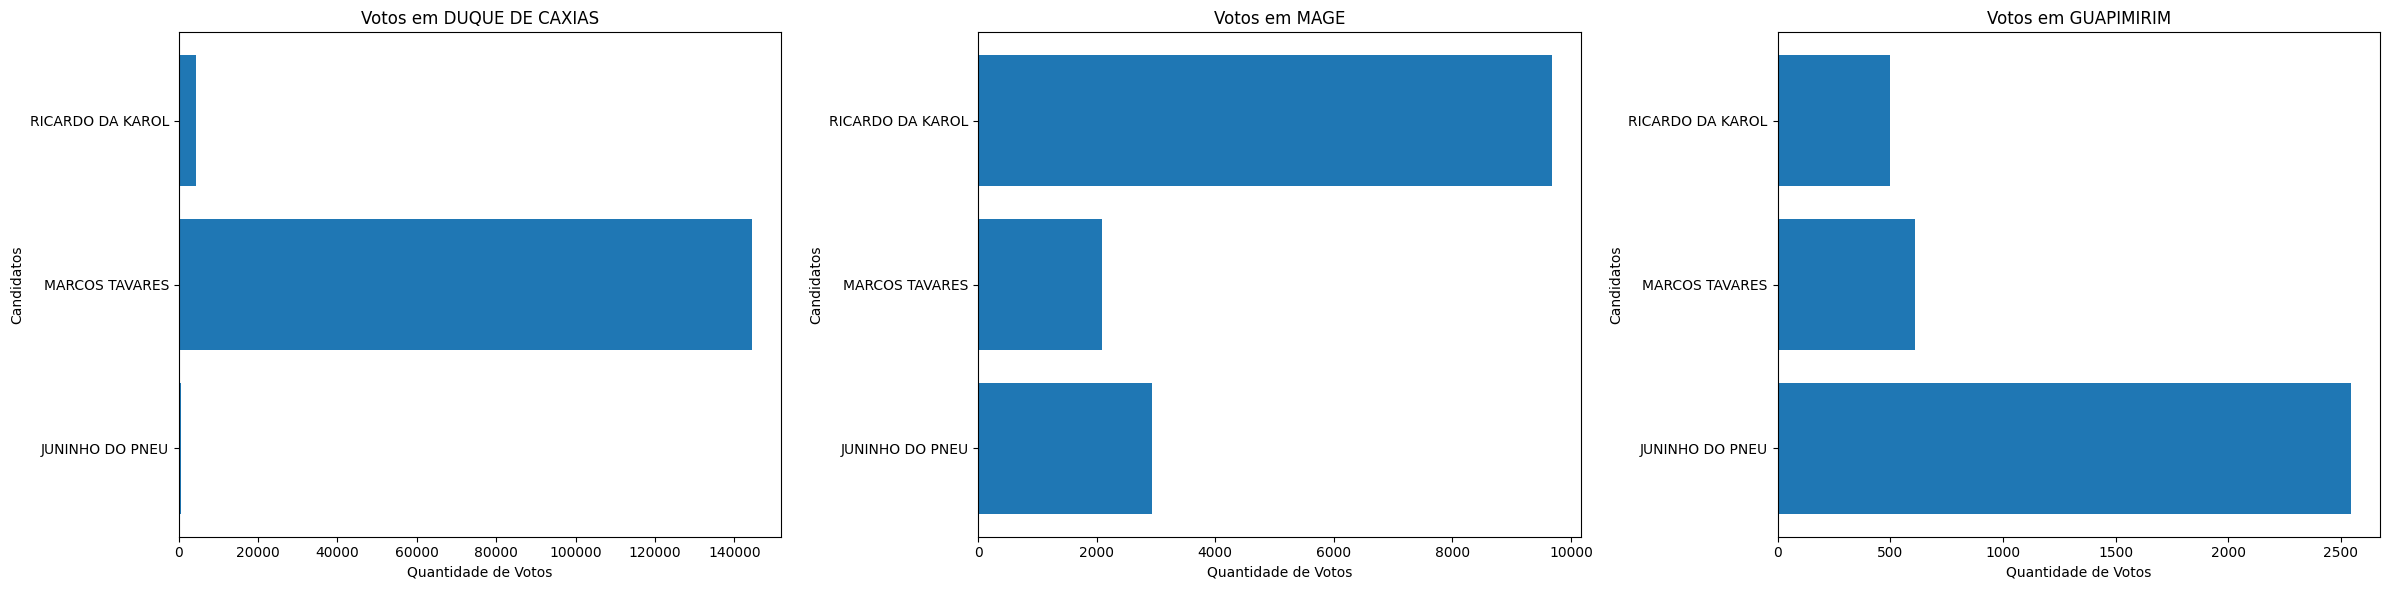

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Define opções de exibição para exibir todas as colunas lado a lado
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Lê o arquivo CSV
df = pd.read_csv("dados_2022_atualizado_final.csv", sep=',', encoding='latin1')

# Seleciona as colunas desejadas
colunas = ['NM_MUNICIPIO', 'NM_VOTAVEL', 'QT_VOTOS']
df_filter = df[colunas]

# Especifique os municípios que deseja incluir no gráfico
municipios_selecionados = ['DUQUE DE CAXIAS', 'MAGE', 'GUAPIMIRIM']

# Filtra o DataFrame para incluir apenas os municípios selecionados
df_filtrado = df_filter[df_filter['NM_MUNICIPIO'].isin(municipios_selecionados)]

# Agrupa os dados por NM_MUNICIPIO e NM_VOTAVEL e calcula a soma dos votos
df_agrupado = df_filtrado.groupby(['NM_MUNICIPIO', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

# Define o número de colunas para os subplots
num_colunas = len(municipios_selecionados)

# Cria subplots para os gráficos de barras
fig, axs = plt.subplots(1, num_colunas, figsize=(8 * num_colunas, 6))

# Itera sobre os municípios selecionados e cria um gráfico de barras para cada um
for i, municipio in enumerate(municipios_selecionados):
    df_municipio = df_agrupado[df_agrupado['NM_MUNICIPIO'] == municipio]
    candidatos = df_municipio['NM_VOTAVEL']
    votos = df_municipio['QT_VOTOS']

    axs[i].barh(candidatos, votos)
    axs[i].set_title(f"Votos em {municipio}")
    axs[i].set_xlabel("Quantidade de Votos")
    axs[i].set_ylabel("Candidatos")

plt.tight_layout()
plt.show()

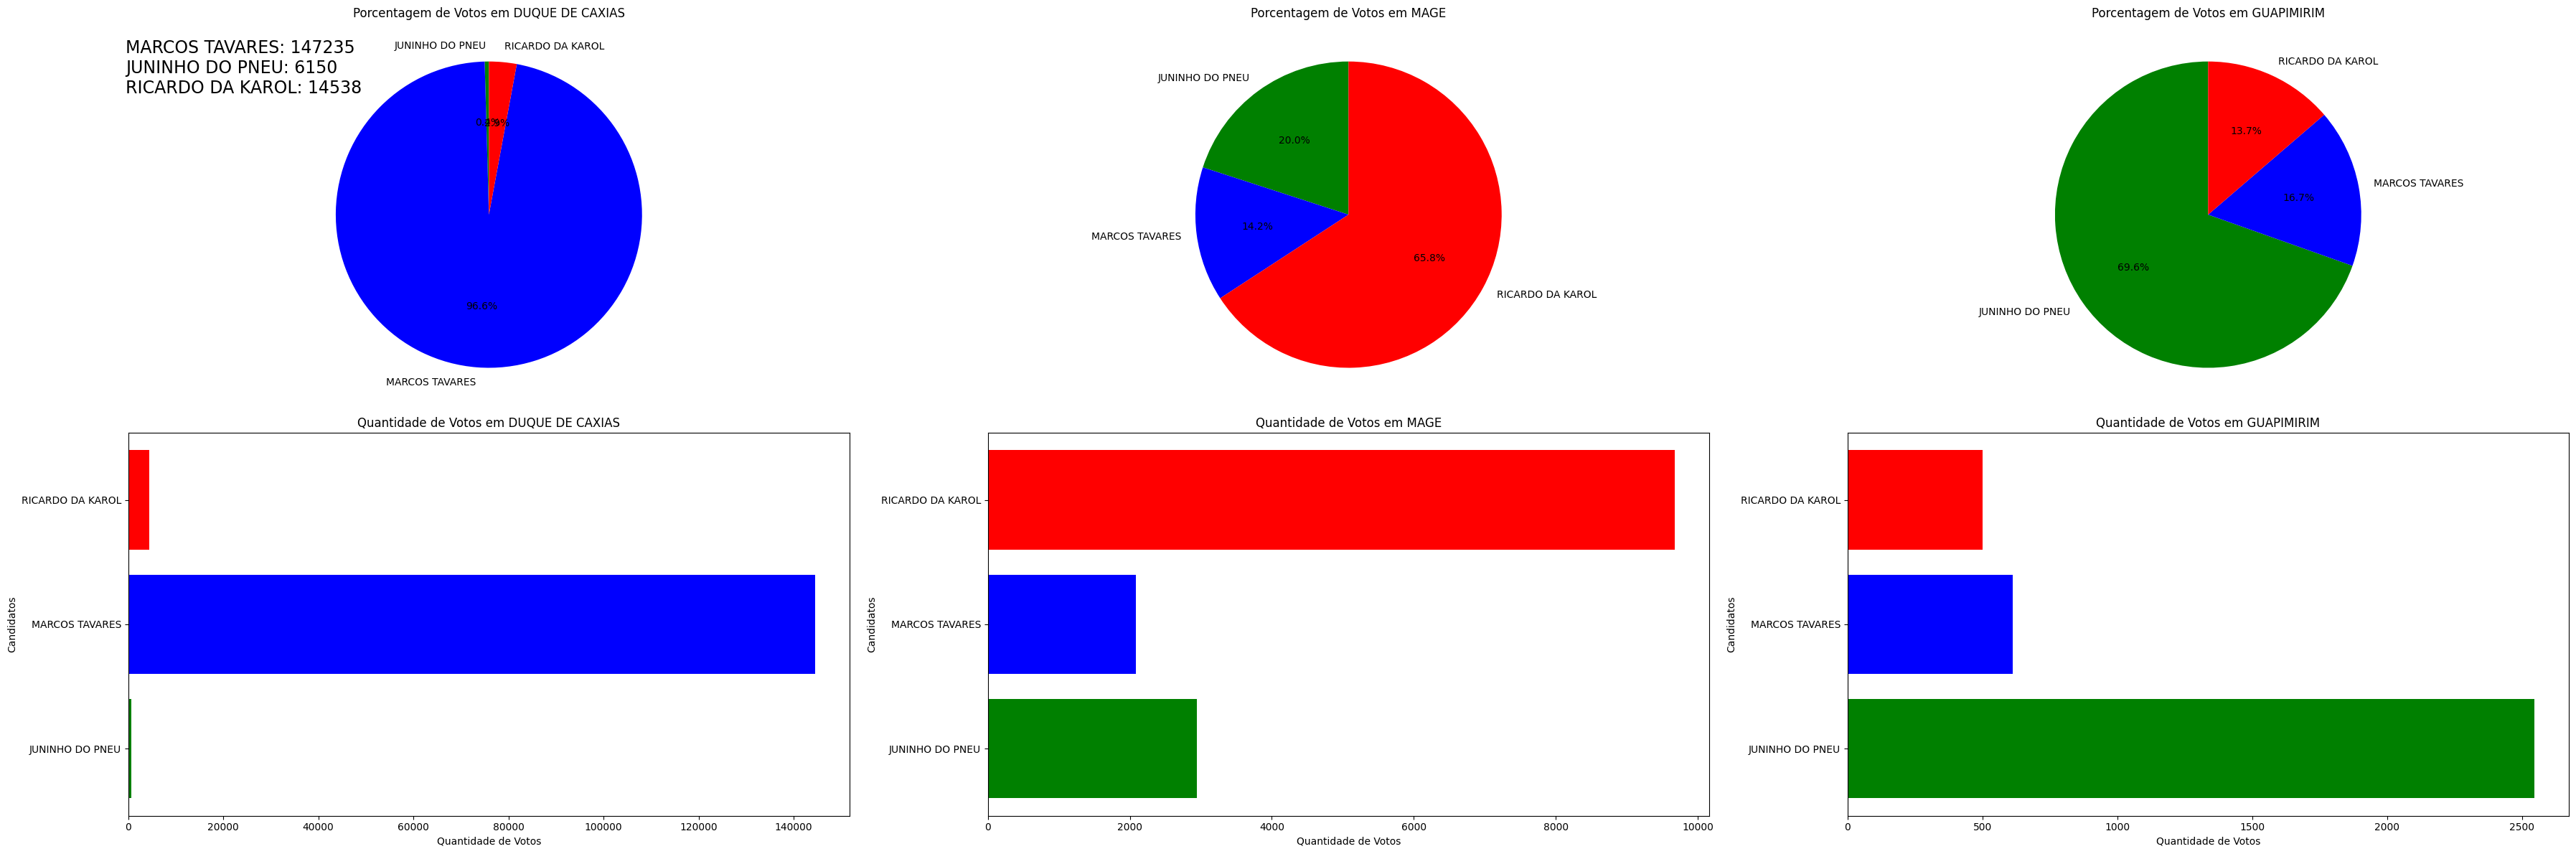

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define opções de exibição para exibir todas as colunas lado a lado
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Lê o arquivo CSV
df = pd.read_csv("dados_2022_atualizado_final.csv", sep=',', encoding='latin1')

# Seleciona as colunas desejadas
colunas = ['NM_MUNICIPIO', 'NM_VOTAVEL', 'QT_VOTOS']
df_filter = df[colunas]

# Especifique os municípios que deseja incluir no gráfico
municipios_selecionados = ['DUQUE DE CAXIAS', 'MAGE', 'GUAPIMIRIM']

# Filtra o DataFrame para incluir apenas os municípios selecionados
df_filtrado = df_filter[df_filter['NM_MUNICIPIO'].isin(municipios_selecionados)]

# Agrupa os dados por NM_MUNICIPIO e NM_VOTAVEL e calcula a soma dos votos
df_agrupado = df_filtrado.groupby(['NM_MUNICIPIO', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

# Define o número de colunas para os subplots
num_colunas = len(municipios_selecionados)

# Cria subplots para os gráficos de pizza e de barras
fig, axs = plt.subplots(2, num_colunas, figsize=(12 * num_colunas, 12))

# Dicionário de cores para candidatos
cores_candidatos = {
    'MARCOS TAVARES': 'blue',
    'JUNINHO DO PNEU': 'green',
    'RICARDO DA KAROL': 'red',
    # Adicione mais cores e candidatos conforme necessário
}

# Inicializa um dicionário para armazenar a quantidade total de votos de cada candidato
total_votos_candidatos = {candidato: 0 for candidato in cores_candidatos}

# Itera sobre os municípios selecionados e cria os gráficos
for i, municipio in enumerate(municipios_selecionados):
    df_municipio = df_agrupado[df_agrupado['NM_MUNICIPIO'] == municipio]
    candidatos = df_municipio['NM_VOTAVEL']
    votos = df_municipio['QT_VOTOS']
    cores = [cores_candidatos.get(candidato, 'gray') for candidato in candidatos]

    # Gráfico de pizza
    axs[0, i].pie(votos, labels=candidatos, autopct='%1.1f%%', startangle=90, colors=cores)
    axs[0, i].set_title(f"Porcentagem de Votos em {municipio}")

    # Gráfico de barras
    axs[1, i].barh(candidatos, votos, color=cores)
    axs[1, i].set_title(f"Quantidade de Votos em {municipio}")
    axs[1, i].set_xlabel("Quantidade de Votos")
    axs[1, i].set_ylabel("Candidatos")

    # Atualiza a quantidade total de votos de cada candidato
    for candidato, voto in zip(candidatos, votos):
        total_votos_candidatos[candidato] += voto

# Adiciona a legenda no canto superior esquerdo com os nomes dos candidatos e a quantidade total de votos
legenda = [f"{candidato}: {total_votos}" for candidato, total_votos in total_votos_candidatos.items()]
legenda_texto = "\n".join(legenda)
fig.text(0.05, 0.95, legenda_texto, fontsize=17, verticalalignment='top')

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Define opções de exibição para exibir todas as colunas lado a lado
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Lê o arquivo CSV
df = pd.read_csv("dados_2022_atualizado_final.csv", sep=',', encoding='latin1')

# Seleciona as colunas desejadas
colunas = ['NR_ZONA', 'NM_VOTAVEL', 'QT_VOTOS']
df_filter = df[colunas]

# Agrupa os dados por NR_ZONA e NM_VOTAVEL e calcula a soma dos votos
df_agrupado = df_filter.groupby(['NR_ZONA', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

# Obtém a lista de zonas
zonas = df_agrupado['NR_ZONA'].unique()

# Define o número de colunas para os subplots (por exemplo, 2 colunas)
num_colunas = 2

# Calcula o número de linhas necessário
num_linhas = (len(zonas) + num_colunas - 1) // num_colunas

# Cria subplots para os gráficos de pizza
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 6 * num_linhas))

# Itera sobre as zonas e cria um gráfico de pizza para cada zona
for i, zona in enumerate(zonas):
    df_zona = df_agrupado[df_agrupado['NR_ZONA'] == zona]
    total_votos = df_zona['QT_VOTOS'].sum()
    porcentagens = df_zona['QT_VOTOS'] / total_votos * 100

    linha = i // num_colunas
    coluna = i % num_colunas
    axs[linha, coluna].pie(porcentagens, labels=df_zona['NM_VOTAVEL'], autopct='%1.1f%%', startangle=90)
    axs[linha, coluna].set_title(f"Zona {zona}")

# Remove subplots vazios, se houver
for i in range(len(zonas), num_colunas * num_linhas):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()
